In [1]:
from google.colab import drive
drive.mount('/content/drive')
# motor_bike, airplane, car ,, dog, person, flower
# motorbikes_airplane_car

Mounted at /content/drive


In [2]:
img_rows, img_cols = 224, 224 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

In [8]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()  
valid_datagen = ImageDataGenerator()

train_generator1 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/N/Train',
        classes = ['motorbike_airplane_car','dog_person_flower'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

valid_generator1 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/N/Validate',
        classes = ['motorbike_airplane_car','dog_person_flower'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

train_generator21 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/N/Train',
        classes = ['motorbike','airplane','car'],
        target_size=(img_rows, img_cols),batch_size=16,class_mode='categorical')

valid_generator21 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/N/Validate',
        classes = ['motorbike','airplane','car'],
        target_size=(img_rows, img_cols),batch_size=16,class_mode='categorical')

train_generator22 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/N/Train',
        classes = ['dog','person','flower'],
        target_size=(img_rows, img_cols),batch_size=16,class_mode='categorical')

valid_generator22 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/N/Validate',
        classes = ['dog','person','flower'],
        target_size=(img_rows, img_cols),batch_size=16,class_mode='categorical')

Found 2298 images belonging to 2 classes.
Found 1068 images belonging to 2 classes.
Found 1149 images belonging to 3 classes.
Found 529 images belonging to 3 classes.
Found 1149 images belonging to 3 classes.
Found 534 images belonging to 3 classes.


In [9]:
base_model1 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model21 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model22 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)

In [10]:
for layer in base_model1.layers:   layer.trainable = False
for layer in base_model21.layers:   layer.trainable = False
for layer in base_model22.layers:   layer.trainable = False

In [11]:
x = base_model1.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)
model1 = tf.keras.models.Model(inputs=base_model1.input, outputs=preds)

x = base_model21.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(3, activation ='softmax')(x)
model21 = tf.keras.models.Model(inputs=base_model21.input, outputs=preds)


x = base_model22.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(3, activation ='softmax')(x)
model22 = tf.keras.models.Model(inputs=base_model22.input, outputs=preds)


In [12]:
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model21.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model22.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
cb1= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb2= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb3= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)


In [15]:
history = model1.fit(
      train_generator1,
      steps_per_epoch=train_generator1.n//train_generator1.batch_size,
      epochs=25,
      validation_data=valid_generator1,callbacks=[cb1],
      validation_steps=25)

Epoch 1/25
71/71 [==============================] - 181s 3s/step - loss: 7.6580e-04 - accuracy: 0.9996 - val_loss: 0.0133 - val_accuracy: 0.9975
Epoch 2/25
71/71 [==============================] - 129s 2s/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/25
71/71 [==============================] - 46s 652ms/step - loss: 0.0032 - accuracy: 0.9982 - val_loss: 3.3845e-05 - val_accuracy: 1.0000
Epoch 4/25
71/71 [==============================] - 27s 385ms/step - loss: 8.3628e-06 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 5/25
71/71 [==============================] - 23s 318ms/step - loss: 1.5324e-06 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 0.9987
Epoch 6/25
71/71 [==============================] - 22s 303ms/step - loss: 7.1869e-07 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 0.9987
Epoch 7/25
71/71 [==============================] - 21s 298ms/step - loss: 4.5673e-07 - accuracy: 1.0000 - val_loss: 0.0052 - 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
history = model21.fit(
      train_generator21,
      steps_per_epoch=train_generator21.n//train_generator21.batch_size,
      epochs=25,
      validation_data=valid_generator21,callbacks=[cb2],
      validation_steps=10)

Epoch 1/25
71/71 [==============================] - 655s 9s/step - loss: 0.1979 - accuracy: 0.9488 - val_loss: 0.0932 - val_accuracy: 0.9812
Epoch 2/25
71/71 [==============================] - 66s 939ms/step - loss: 0.0118 - accuracy: 0.9982 - val_loss: 1.0431e-08 - val_accuracy: 1.0000
Epoch 3/25
71/71 [==============================] - 47s 668ms/step - loss: 8.6135e-06 - accuracy: 1.0000 - val_loss: 7.4506e-10 - val_accuracy: 1.0000
Epoch 4/25
71/71 [==============================] - 37s 532ms/step - loss: 1.0522e-10 - accuracy: 1.0000 - val_loss: 2.3692e-07 - val_accuracy: 1.0000
Epoch 5/25
71/71 [==============================] - 28s 403ms/step - loss: 1.0522e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/25
71/71 [==============================] - 19s 275ms/step - loss: 1.0522e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/25
71/71 [==============================] - 19s 275ms/step - loss: 1.0522e-10 - accuracy: 1.0000 - v

In [17]:
history = model22.fit(
      train_generator22,
      steps_per_epoch=train_generator22.n//train_generator22.batch_size,
      epochs=25,
      validation_data=valid_generator22,callbacks=[cb3],
      validation_steps=10)

Epoch 1/25
71/71 [==============================] - 655s 9s/step - loss: 0.2033 - accuracy: 0.9453 - val_loss: 0.0342 - val_accuracy: 0.9875
Epoch 2/25
71/71 [==============================] - 69s 983ms/step - loss: 0.0118 - accuracy: 0.9956 - val_loss: 0.0062 - val_accuracy: 0.9937
Epoch 3/25
71/71 [==============================] - 45s 638ms/step - loss: 1.5643e-04 - accuracy: 1.0000 - val_loss: 8.1880e-06 - val_accuracy: 1.0000
Epoch 4/25
71/71 [==============================] - 42s 603ms/step - loss: 1.2507e-06 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9937
Epoch 5/25
71/71 [==============================] - 29s 416ms/step - loss: 4.4893e-07 - accuracy: 1.0000 - val_loss: 1.3789e-05 - val_accuracy: 1.0000
Epoch 6/25
71/71 [==============================] - 21s 299ms/step - loss: 2.0979e-07 - accuracy: 1.0000 - val_loss: 7.4058e-06 - val_accuracy: 1.0000
Epoch 7/25
71/71 [==============================] - 17s 243ms/step - loss: 1.3120e-07 - accuracy: 1.0000 - val_loss:

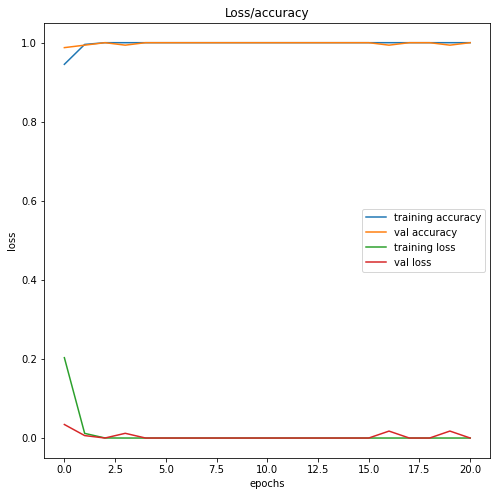

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
# model1.save ( '/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp2/model1/6C_prop2/' )
# model21.save( '/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp2/model21/6C_prop2/')
# model22.save( '/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp2/model22/6C_prop2/')

"""
"""
import tensorflow as tf
model1 =tf.keras.models.load_model('/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp2/model1/6C_prop2/' )
model21=tf.keras.models.load_model('/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp2/model21/6C_prop2/')
model22=tf.keras.models.load_model('/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp2/model22/6C_prop2/')

In [6]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
import glob

In [7]:
ct_person=0;ct_dog=0;ct_motorbike=0; ct_airplane=0; ct_car=0; ct_flower=0;

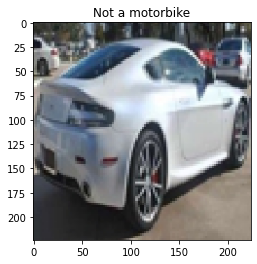

169


In [8]:

img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/motorbike'
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesb1 = model1.predict(images, batch_size=10)
  classesb21 = model21.predict(images, batch_size=10)
  #classesb22 = model22.predict(images, batch_size=10)
  # print('bikes:',classesb1[0][0],classesb21[0])
  if((classesb1[0] < .5) and (classesb21[0][0] > .5)):    ct_motorbike=ct_motorbike+1
  else:
    plt.imshow(img)
    plt.title('Not a motorbike')
    plt.show();
print(ct_motorbike)

In [26]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/airplane' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classess1 = model1.predict(images, batch_size=10)
  classess21 = model21.predict(images, batch_size=10)
  #classess22 = model22.predict(images, batch_size=10)
  # print('ships:',classess1[0][0],classess21[0])
  if((classess1[0] < .5) and (classess21[0][1] > .5)):    ct_airplane=ct_airplane+1
  else:
    plt.imshow(img)
    plt.title('Not an airplane')
    plt.show();
print(ct_airplane)

./
167


./


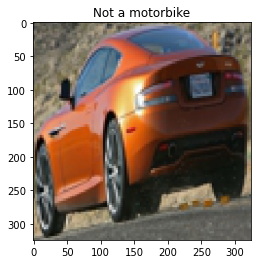

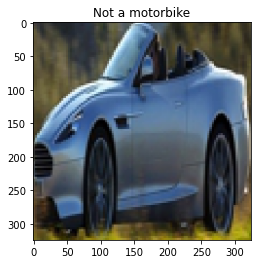

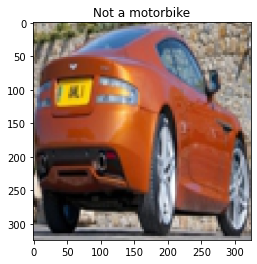

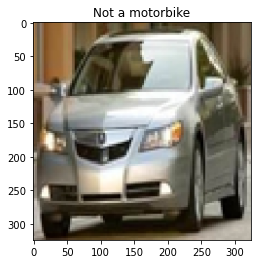

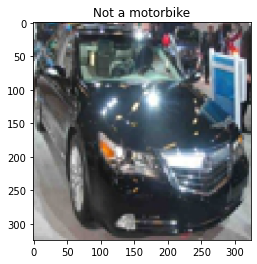

161


In [33]:
ct_car = 0
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/car' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classest1 = model1.predict(images, batch_size=10)
  classest21 = model21.predict(images, batch_size=10)
  # classest21 = model22.predict(images, batch_size=10)
  # print('tracs:',classest1[0][1],classest22[0])
  if((classest1[0] < .5) and (classest21[0][2] > .5)):    ct_car=ct_car+1
  else:
    plt.imshow(img)
    plt.title('Not a car')
    plt.show()
print(ct_car)

./


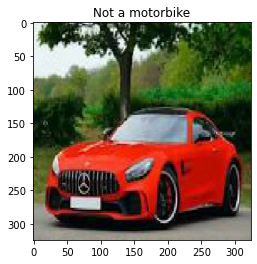

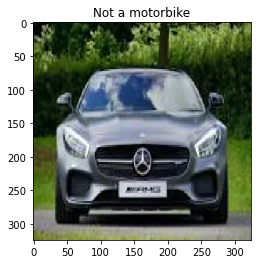

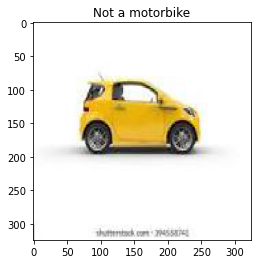

167


In [46]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/some Images' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw22 = model22.predict(images, batch_size=10)
  # print('wagons:',classesw1[0][1],classesw22[0])
  if((classesw1[0] > .5) and (classesw22[0][0] < .5)):    ct_flower=ct_flower+1
  else:
    plt.imshow(img)
    plt.title('Not a flower')
    plt.show()
print(ct_flower)

In [50]:
ct_dog = 0
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/dog' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw22 = model22.predict(images, batch_size=10)
  #print('cats:',classesw1[0][2],classesw23[0])
  if((classesw1[0] > .5) and (classesw22[0][1] < .5)):    ct_dog=ct_dog+1
  else:
    plt.imshow(img)
    plt.title('Not a dog')
    plt.show()
print(ct_dog)

./
142


In [58]:
ct_person = 0
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/person' # Enter Directory of all images.
# img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/chris_evans' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw22 = model22.predict(images, batch_size=10)
  # print('dogs:',classesw1[0][2],classesw23[0])
  if((classesw1[0] > .5) and (classesw22[0][2] < .5)):     ct_person=ct_person+1
  else:
    plt.imshow(img)
    plt.title('Not a person')
    plt.show()
print(ct_person)

./
166


In [59]:
print('./')
ct_total=ct_motorbike+ct_airplane+ct_car+ct_flower+ct_person+ct_dog

./


In [60]:
print('Total = ',ct_total)
print('Breakup = ',ct_person,ct_dog,ct_motorbike, ct_airplane, ct_car, ct_flower)  
print('accuracy=',ct_total/977) 

Total =  972
Breakup =  166 142 169 167 161 167
accuracy= 0.9948822927328557


In [11]:
ct_person=0;ct_dog=0;ct_motorbike=0; ct_airplane=0; ct_car=0; ct_flower=0;

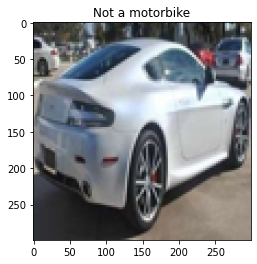

169


In [12]:
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/motorbike'
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesb1 = model1.predict(images, batch_size=10)
  classesb21 = model21.predict(images, batch_size=10)
  #classesb22 = model22.predict(images, batch_size=10)
  # print('bikes:',classesb1[0][0],classesb21[0])
  if((classesb1[0] < .5) and (classesb21[0][0] > .5)):    ct_motorbike=ct_motorbike+1
  else:
    plt.imshow(img)
    plt.title('Not a motorbike')
    plt.show();
print(ct_motorbike)

In [13]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/airplane' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classess1 = model1.predict(images, batch_size=10)
  classess21 = model21.predict(images, batch_size=10)
  #classess22 = model22.predict(images, batch_size=10)
  # print('ships:',classess1[0][0],classess21[0])
  if((classess1[0] < .5) and (classess21[0][1] > .5)):    ct_airplane=ct_airplane+1
  else:
    plt.imshow(img)
    plt.title('Not an airplane')
    plt.show();
print(ct_airplane)

./
167


./


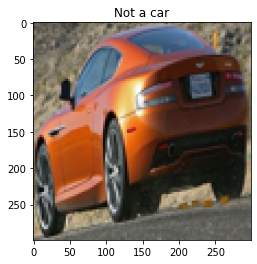

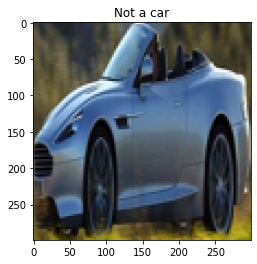

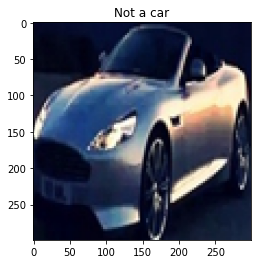

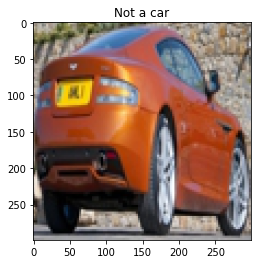

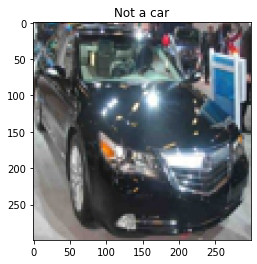

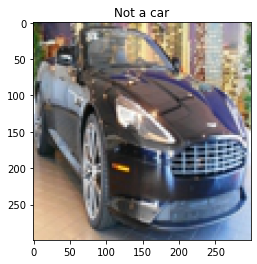

160


In [14]:
ct_car = 0
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/car' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classest1 = model1.predict(images, batch_size=10)
  classest21 = model21.predict(images, batch_size=10)
  # classest21 = model22.predict(images, batch_size=10)
  # print('tracs:',classest1[0][1],classest22[0])
  if((classest1[0] < .5) and (classest21[0][2] > .5)):    ct_car=ct_car+1
  else:
    plt.imshow(img)
    plt.title('Not a car')
    plt.show()
print(ct_car)

In [20]:
ct_flower = 0
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/flower' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw22 = model22.predict(images, batch_size=10)
  # print('wagons:',classesw1[0][1],classesw22[0])
  if((classesw1[0] > .5) and (classesw22[0][0] < .5)):    ct_flower=ct_flower+1
  else:
    plt.imshow(img)
    plt.title('Not a flower')
    plt.show()
print(ct_flower)

./
166


In [16]:
ct_dog = 0
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/dog' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw22 = model22.predict(images, batch_size=10)
  #print('cats:',classesw1[0][2],classesw23[0])
  if((classesw1[0] > .5) and (classesw22[0][1] < .5)):    ct_dog=ct_dog+1
  else:
    plt.imshow(img)
    plt.title('Not a dog')
    plt.show()
print(ct_dog)

./
142


In [17]:
ct_person = 0
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/person' # Enter Directory of all images.
# img_dir = '/content/drive/MyDrive/Colab Notebooks/N/Test/chris_evans' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw22 = model22.predict(images, batch_size=10)
  # print('dogs:',classesw1[0][2],classesw23[0])
  if((classesw1[0] > .5) and (classesw22[0][2] < .5)):     ct_person=ct_person+1
  else:
    plt.imshow(img)
    plt.title('Not a person')
    plt.show()
print(ct_person)

./
166


In [21]:
print('./')
ct_total=ct_motorbike+ct_airplane+ct_car+ct_flower+ct_person+ct_dog

./


In [22]:
print('Total = ',ct_total)
print('Breakup = ',ct_person,ct_dog,ct_motorbike, ct_airplane, ct_car, ct_flower)  
print('accuracy=',ct_total/977) 

Total =  970
Breakup =  166 142 169 167 160 166
accuracy= 0.9928352098259979
